In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import matplotlib
matplotlib.__version__

'3.3.3'

### Fourier Transform 
- We don't feed speech signals in time domain. Why?
- Convert the signals to freq domain. How and Why?

In [2]:
def FFT(x):
    fft = np.fft.fft(x)
    return fft

def invFFT(x):
    ifft = np.fft.ifft(x)
    return ifft

def sin(f):
    fs=200
    length = 1
    N = fs*length
    t = np.arange(0, 1, 1/N)
    s = np.sin(2*np.pi*f*t)
    return s

Text(0.5, 1.0, 'Frequency-Domain')

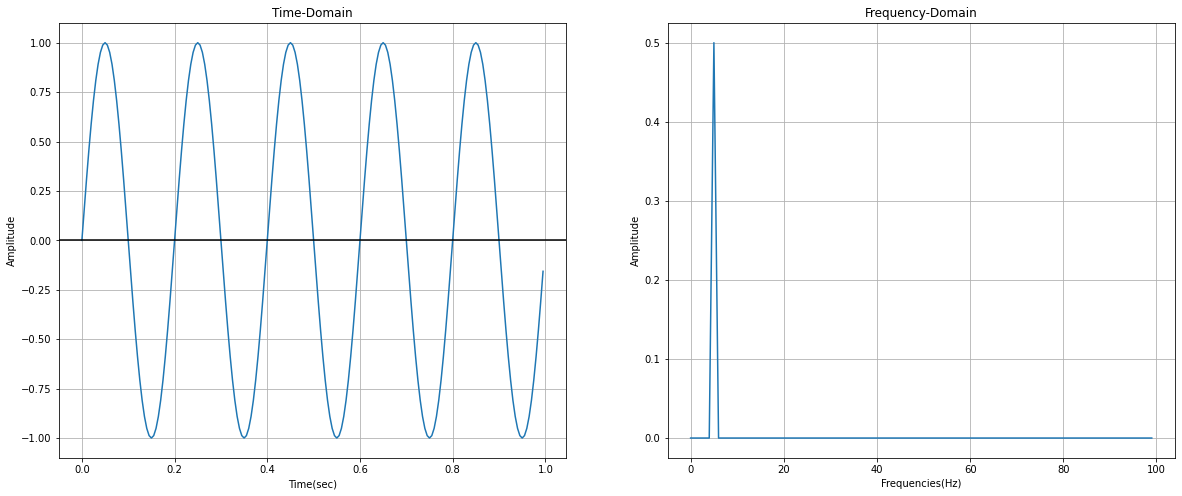

In [3]:
fs = 200
N = 1*fs 
#Sinusoidal with freq=10Hz
s = sin(5)
t = np.arange(0, 1, 1/N)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax=ax.ravel()
ax[0].plot(t, s)
ax[0].set_xlabel('Time(sec)')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True, which='both')
ax[0].axhline(y=0, color='k') 
ax[0].set_title('Time-Domain') 
#FFT conversion
ffts = FFT(s)
fft = (1/N)*np.abs(ffts)[:len(ffts)//2]
freq = np.fft.fftfreq(N, 1/fs)[:fs//2]
ax[1].plot(freq, fft)
ax[1].set_xlabel('Frequencies(Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid(True, which='both')
ax[1].set_title('Frequency-Domain') 


Text(0.5, 1.0, 'Frequency-Domain')

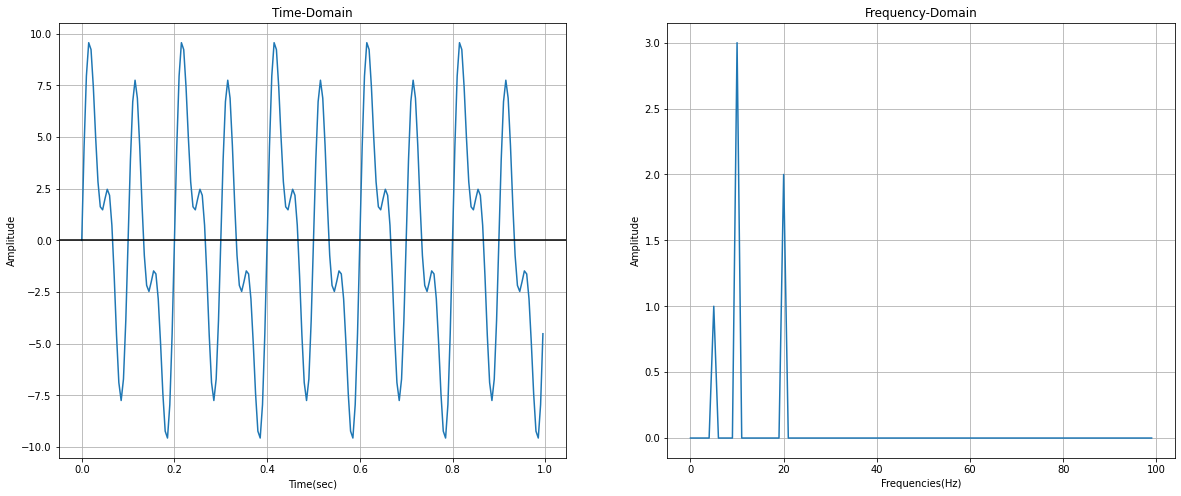

In [4]:
fs=200
N=1*fs
t = np.arange(0, 1, 1/N)

s1 = 2*sin(5)
s2 = 6*sin(10)
s3 = 4*sin(20)
s = s1+s2+s3

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax=ax.ravel()
ax[0].plot(t, s)
ax[0].set_xlabel('Time(sec)')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True, which='both')
ax[0].axhline(y=0, color='k') 
ax[0].set_title('Time-Domain') 

#FFT conversion
ffts = FFT(s)
fft = (1/N)*np.abs(ffts)[:len(ffts)//2]
freq = np.fft.fftfreq(N, 1/fs)[:fs//2]
ax[1].plot(freq, fft)
ax[1].set_xlabel('Frequencies(Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid(True, which='both')
ax[1].set_title('Frequency-Domain')


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstructed Wave')

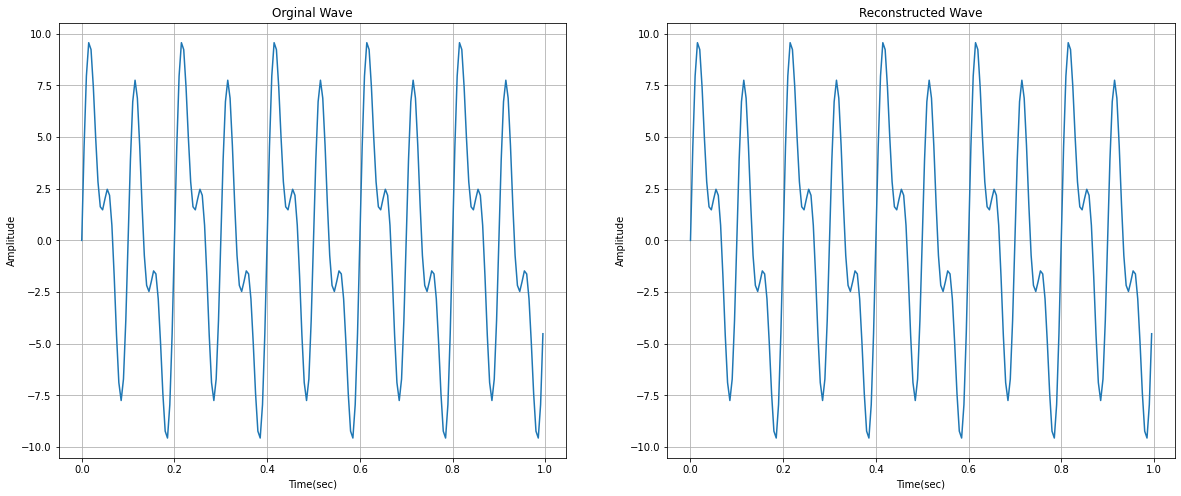

In [5]:
#Inverse FFT conversion
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax=ax.ravel()
ax[0].plot(t, s)
ax[0].grid(True, which='both')
ax[0].set_xlabel('Time(sec)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Orginal Wave')

#Applying inverse FFT on the fft of signal to reconstruct it.
s = invFFT(ffts)
ax[1].plot(t, s)
ax[1].grid(True, which='both')
ax[1].set_xlabel('Time(sec)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Reconstructed Wave')

Text(0.5, 1.0, 'Frequency-Domain')

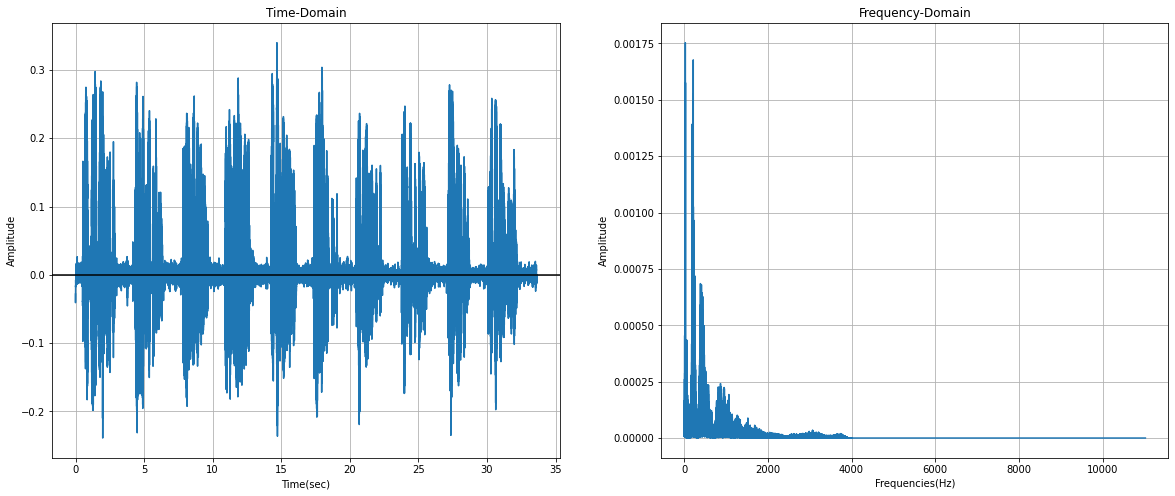

In [6]:
audio, fs = librosa.load('../audio/OSR_us_000_0010_8k.wav')
N = len(audio)
t = np.arange(0, len(audio)/fs, 1/fs)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax=ax.ravel()
ax[0].plot(t, audio)
ax[0].set_xlabel('Time(sec)')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True, which='both')
ax[0].axhline(y=0, color='k') 
ax[0].set_title('Time-Domain') 

#FFT conversion
ffts = FFT(audio)
fft = (1/N)*np.abs(ffts)[:len(ffts)//2]
freq = np.fft.fftfreq(N, 1/fs)
ax[1].plot(freq[:len(fft)], fft)
ax[1].set_xlabel('Frequencies(Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid(True, which='both')
ax[1].set_title('Frequency-Domain')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstructed Wave')

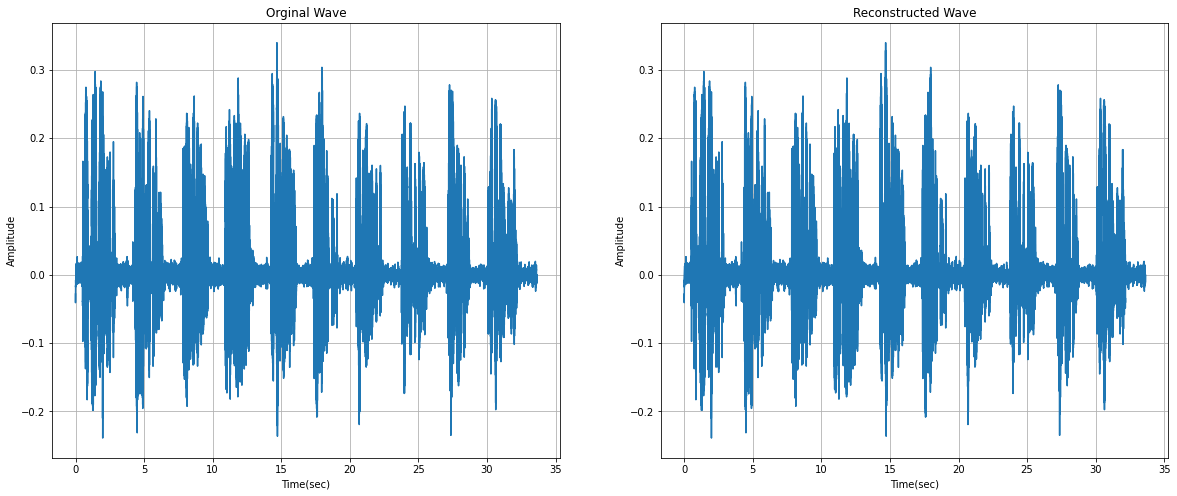

In [7]:
#Inverse FFT conversion
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax=ax.ravel()
ax[0].plot(t, audio)
ax[0].grid(True, which='both')
ax[0].set_xlabel('Time(sec)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Orginal Wave')

#Applying inverse FFT on the fft of audio to reconstruct it.
audio = invFFT(ffts)
ax[1].plot(t, audio)
ax[1].grid(True, which='both')
ax[1].set_xlabel('Time(sec)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Reconstructed Wave')

### STFT
- Difference between sinusoidals and speech.
- How to handle the variations in speech and perform fft?
- Window function, hop length


![stft_pic](../img/stft.jpg "Title")

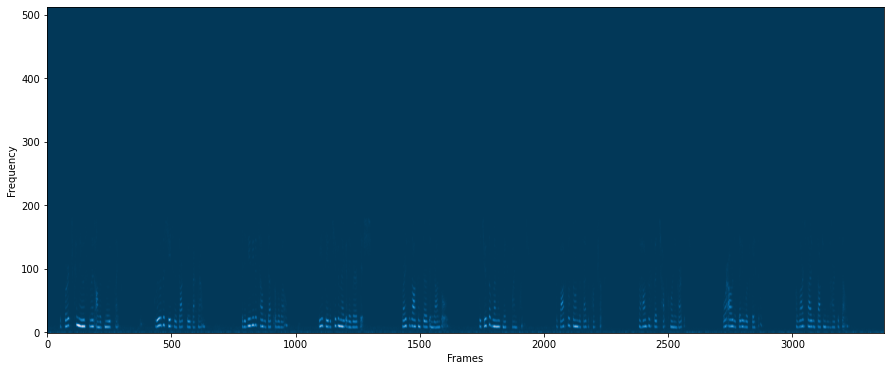

In [29]:
def STFT(x, win_length, hop_length, fs):
    win_length = int((win_length/1000)*fs)
    hop_length = int((hop_length/1000)*fs)
    spec = librosa.stft(x, n_fft=1024, win_length = win_length, hop_length=hop_length)
    return np.abs(spec)

audio, fs = librosa.load('../audio/OSR_us_000_0010_8k.wav')
sp = STFT(x=audio, win_length=25, hop_length=10, fs=fs)

plt.figure(figsize=(15, 6))
plt.ylabel('Frequency')
plt.xlabel('Frames')
plt.imshow(sp[:,:], origin='lower', aspect='auto', cmap = "PuBu_r" )
    

In [30]:
audio, fs = librosa.load('../OSR_us_000_0034_8k.wav')
sp = STFT(x=audio, win_length=25, hop_length=10, fs=fs)
frames_ind = np.arange(sp.shape[1], 25) 
plt.figure(figsize=(15, 8))
plt.ylabel('Frequency')
plt.xlabel('Frames')
plt.imshow(sp[:20,:], origin='lowest', aspect='auto', cmap = "PuBu_r")

/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'sample_audiofiles/OSR_us_000_0034_8k.wav'